## <center> Opening a new Restaurant in Canada</center>

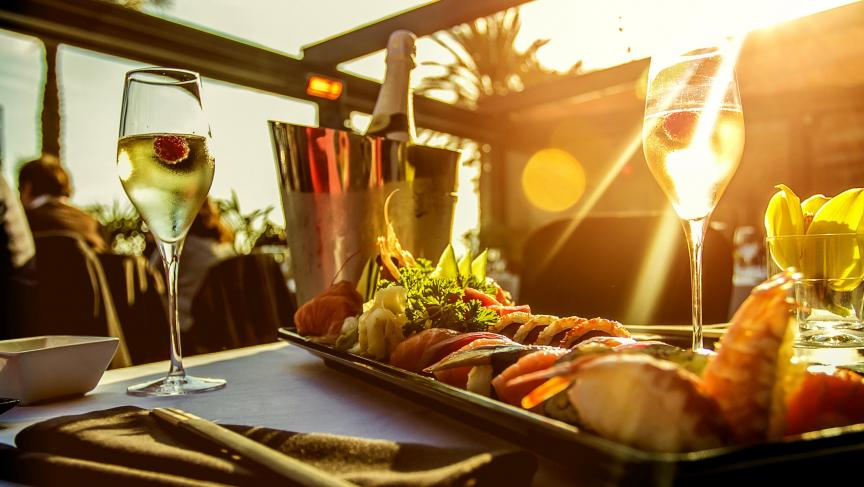

In [28]:
from IPython.display import Image
Image("https://canada.businesschief.com/public/uploads/large/large_5dc7c8de_f493_0769_e204_b05f096d7f90.jpg")

### Introduction

With over 60% of Canadian adults eating out at least 1-2x per week, the restaurant / food service industry is one of the fastest growing industries in Canada today. 
While restaurant trends typically come and go,it is doubtful Canadians will stop visiting eating establishments anytime soon. 
It is VERY PROFITABLE!, because most of the Canadians don’t know what REAL Indian Food is! Most of the BEST Indian Food is sold on Indian Streets and Dhaba’s and Canadians are pretty much hung up like British and they want to have sanitized foods like a hospital food and play it safe!


### Business Problem

The objective of this Capstone Project is to find a location for your restaurant in Toronto,canada. We can use Data Science techniques i.e. "Machine Learning" algorithms such as clustering and different "tools".


### Target Audience

To recommend the correct location. The objective is to locate and recommend which location of Toronto city will be best choice to start a restaurant. 
This would interest anyone who wants to start a new restaurant in Toronto city.

## <center>Data section</center>

To solve this Problem, we need following Data:
    1. List of Neighborhoods in Toronto, Canada.
    2. Laitute and longitute of these Neighborhoods.
    3. Venue Data Related to Indian Restaurants.

In [30]:
#  @hidden_cell
import requests
from bs4 import BeautifulSoup
import pandas as pd

page = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('tbody')
rows = table.select('tr')
row = [r.get_text() for r in rows]
df = pd.DataFrame(row)
df1 = df[0].str.split('\n', expand=True)
df2 = df1.rename(columns=df1.iloc[0])
df3 = df2.drop(df2.index[0])
df3.head()
df3.rename(columns={"Postal Code": "PostalCode"}, inplace=True)
df3.head()
df4 = df3[df3.Borough != 'Not assigned']
df4.head()



,,PostalCode,,Borough,,Neighborhood,
3,,M3A,,North York,,Parkwoods,
4,,M4A,,North York,,Victoria Village,
5,,M5A,,Downtown Toronto,,"Regent Park, Harbourfront",
6,,M6A,,North York,,"Lawrence Manor, Lawrence Heights",
7,,M7A,,Downtown Toronto,,"Queen's Park, Ontario Provincial Government",


In [32]:
#  @hidden_cell
coordinates = pd.read_csv('https://cocl.us/Geospatial_data')
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Extracting the Data

1. We will use web scrabing techniques to extract data from the wikipedia, with the help of python requests and BeautifulSoup packages.
2. Getting Laitute and longitute of these Neighborhoods via Geocoder Package.
3. Using Foursquare API to get venue data related to these Neighborhoods.
